# Interpretable Machine Learning with LIME - Tabular Data - Part 2 GLM and LIME

In this series of notebooks, we will fit a statistical (GLM) and a machine learning (RF) model to the Cleveland Heart Diseases data. Then, we will demonstrate using LIME (local interpretable model-agnostic explanations) to provide an easy for human to interpret explanation for the predictions. The goal here is to explore how LIME can provide a simple to interpret explanation for complex (normally human uninterpretable data) models.

Part 2 will be building a logistical model and using LIME to explain the model.

### Load the libraries and the saved data

In [1]:
#Load libraries
library(tidyverse)
library(caret)
library(e1071)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [2]:
load("heart_data.RData")

### Build a GLM model through the caret package so the input and output is standardized for LIME.
Note that while a GLM model is in principle "understandable" and "interpretable" (see summary(glm_fit) cell), it requires a lot of effort and statistical expertise. Many variable linear models (and complex statisical models) are not actually easily human interpretable in practice.

For this model, the accuracy for the training data is 0.86. The accuracy for the test data is 0.85. The small shrinkage means we are not overfitting the data (also, we had relatively few variables compared to samples). 

Note that despite using more variables than the decision tree (14 vs 3), the accuracy is not really better. Complex models are not always better.

In [3]:
#fit <- glm(AHD~.+0, data = dat, family = binomial)
glm_fit<-train(AHD~.,data=datTrain,trControl=trainControl(method = "none"),   method="glm",  family=binomial())

In [4]:
summary(glm_fit)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1136  -0.4633  -0.1296   0.3128   2.8486  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -5.958766   3.081396  -1.934 0.053139 .  
Age                  -0.008504   0.028981  -0.293 0.769189    
Sex1                  1.438169   0.601467   2.391 0.016798 *  
ChestPainnonanginal  -1.829358   0.584019  -3.132 0.001734 ** 
ChestPainnontypical  -1.034694   0.633270  -1.634 0.102281    
ChestPaintypical     -2.746182   0.801504  -3.426 0.000612 ***
RestBP                0.020829   0.012885   1.616 0.105991    
Chol                  0.008443   0.005565   1.517 0.129260    
Fbs1                 -0.952437   0.710604  -1.340 0.180141    
RestECG1             12.526380 944.119757   0.013 0.989414    
RestECG2              0.259319   0.436477   0.594 0.552433    
MaxHR                -0.011167   0.012617  -0.885 0.376098    
ExAng1                0.467080   0.50118

In [5]:
predict_datTrain <- predict(glm_fit, subset(datTrain, select = -c(AHD)))
confusionMatrix(predict_datTrain, datTrain$AHD)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  116  22
       Yes  12  88
                                         
               Accuracy : 0.8571         
                 95% CI : (0.8061, 0.899)
    No Information Rate : 0.5378         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.7108         
                                         
 Mcnemar's Test P-Value : 0.1227         
                                         
            Sensitivity : 0.9062         
            Specificity : 0.8000         
         Pos Pred Value : 0.8406         
         Neg Pred Value : 0.8800         
             Prevalence : 0.5378         
         Detection Rate : 0.4874         
   Detection Prevalence : 0.5798         
      Balanced Accuracy : 0.8531         
                                         
       'Positive' Class : No             
                                         

In [6]:
predict_datTest <- predict(glm_fit, subset(datTest, select = -c(AHD)))
confusionMatrix(predict_datTest, datTest$AHD)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  25   2
       Yes  7  25
                                          
               Accuracy : 0.8475          
                 95% CI : (0.7301, 0.9278)
    No Information Rate : 0.5424          
    P-Value [Acc > NIR] : 7.195e-07       
                                          
                  Kappa : 0.6971          
                                          
 Mcnemar's Test P-Value : 0.1824          
                                          
            Sensitivity : 0.7812          
            Specificity : 0.9259          
         Pos Pred Value : 0.9259          
         Neg Pred Value : 0.7812          
             Prevalence : 0.5424          
         Detection Rate : 0.4237          
   Detection Prevalence : 0.4576          
      Balanced Accuracy : 0.8536          
                                          
       'Positive' Class : No              
                                 

### Explore Features of LIME for tabular data
We take LIME for test ride. For a detailed analysis, we separate the prediction/results combinations into 4 cases - Yes/Yes, Yes/No, No/Yes, and No/No to understand how the models are predicting correctly and incorrectly.

We use plot_explanations function to get an overview of the importances of the features (and derive insight on the overall model). 

In [7]:
library(lime)


Attaching package: ‘lime’

The following object is masked from ‘package:dplyr’:

    explain



In [8]:
expln <- lime(datTrain, model = glm_fit)

In [9]:
explanation <- explain(datTrain, expln, n_labels = 1, n_features = 4, feature_select = "highest_weights")

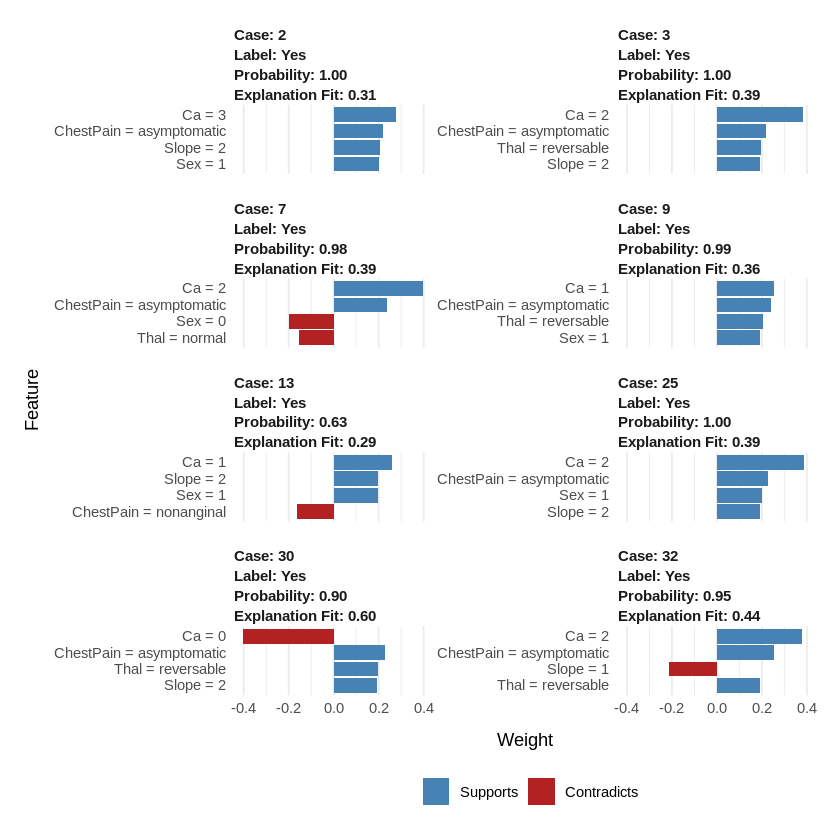

In [10]:
plot_features(explanation, ncol = 2, row.names(datTrain[which((datTrain$AHD == "Yes") & (predict_datTrain == "Yes"))[1:8],]))

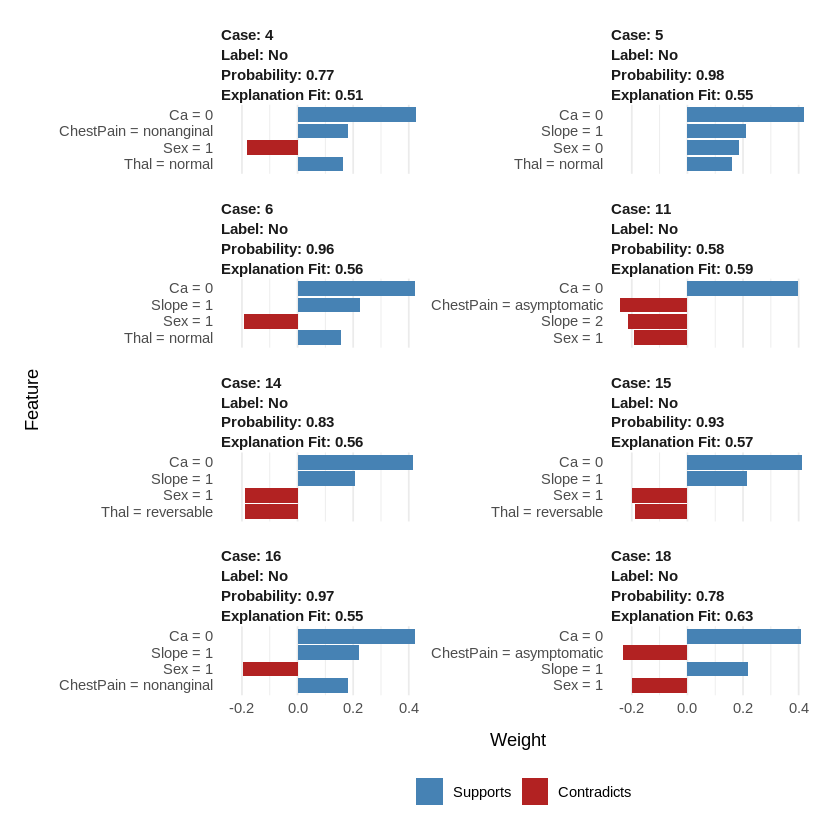

In [11]:
plot_features(explanation, ncol = 2, row.names(datTrain[which((datTrain$AHD == "No") & (predict_datTrain == "No"))[1:8],]))

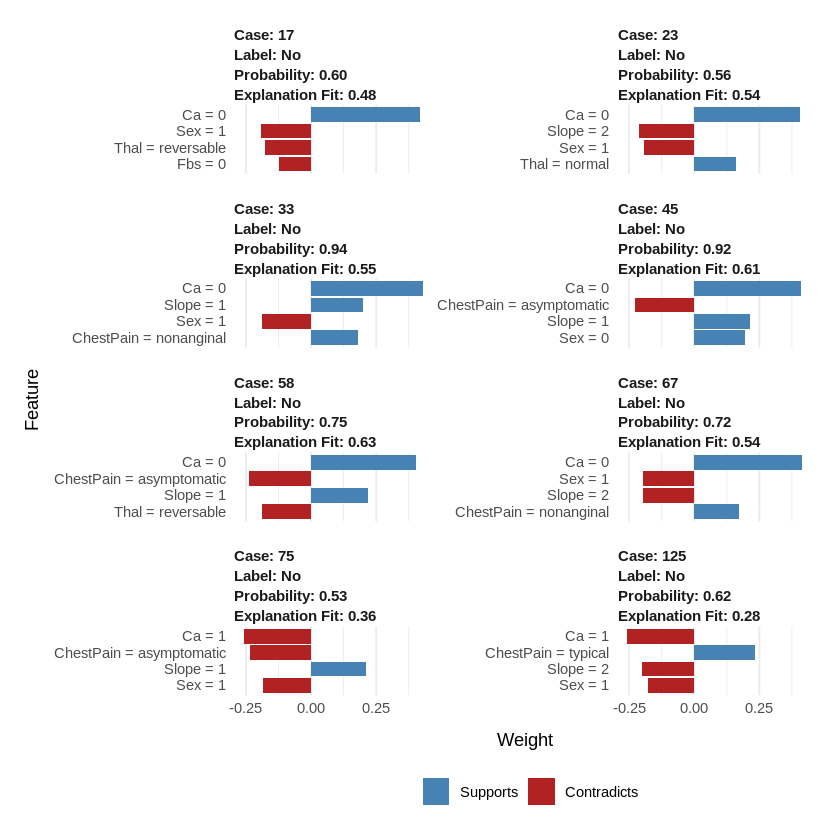

In [12]:
plot_features(explanation, ncol = 2, row.names(datTrain[which((datTrain$AHD == "Yes") & (predict_datTrain == "No"))[1:8],]))

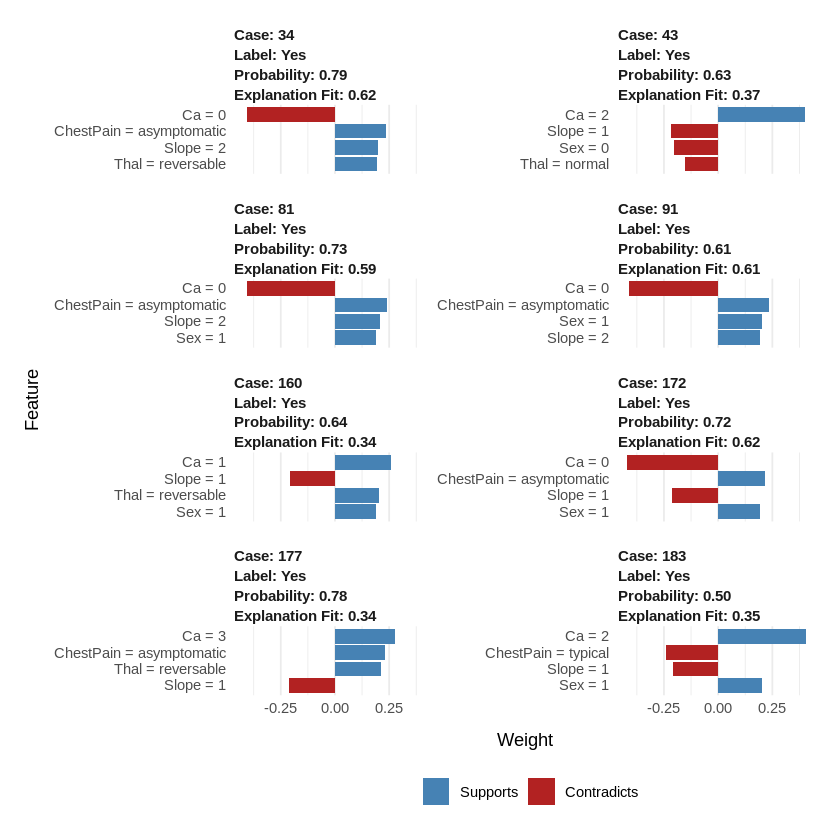

In [13]:
plot_features(explanation, ncol = 2, row.names(datTrain[which((datTrain$AHD == "No") & (predict_datTrain == "Yes"))[1:8],]))

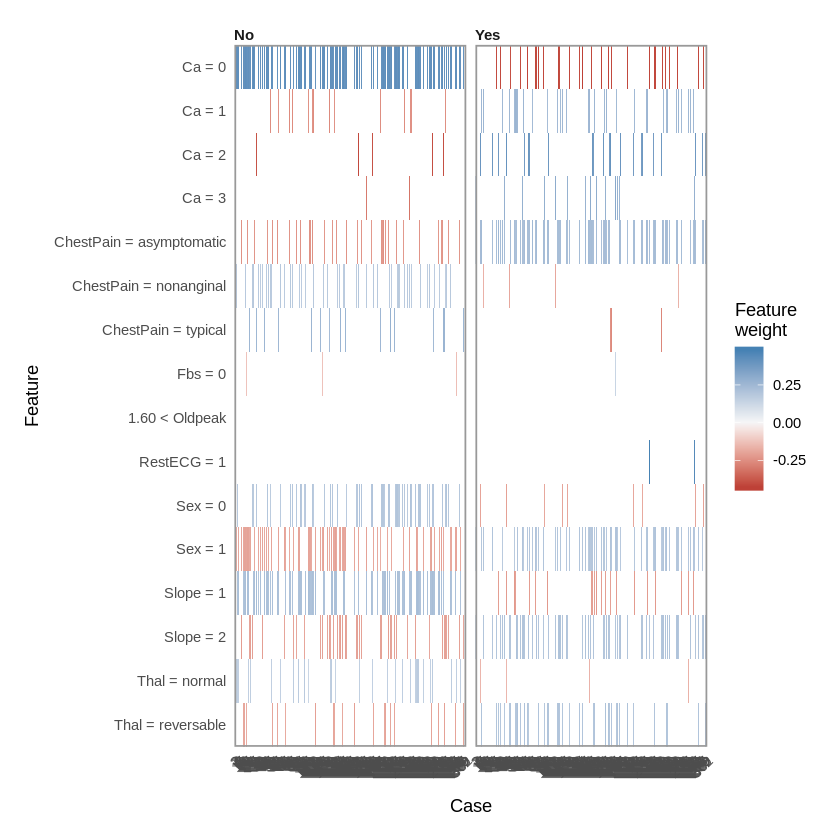

In [14]:
plot_explanations(explanation)